#Ejercicio cars

In [9]:
import seaborn as sns; 

mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [10]:
mpg_n = mpg.select_dtypes(include='number')
mpg_n.shape

(398, 7)

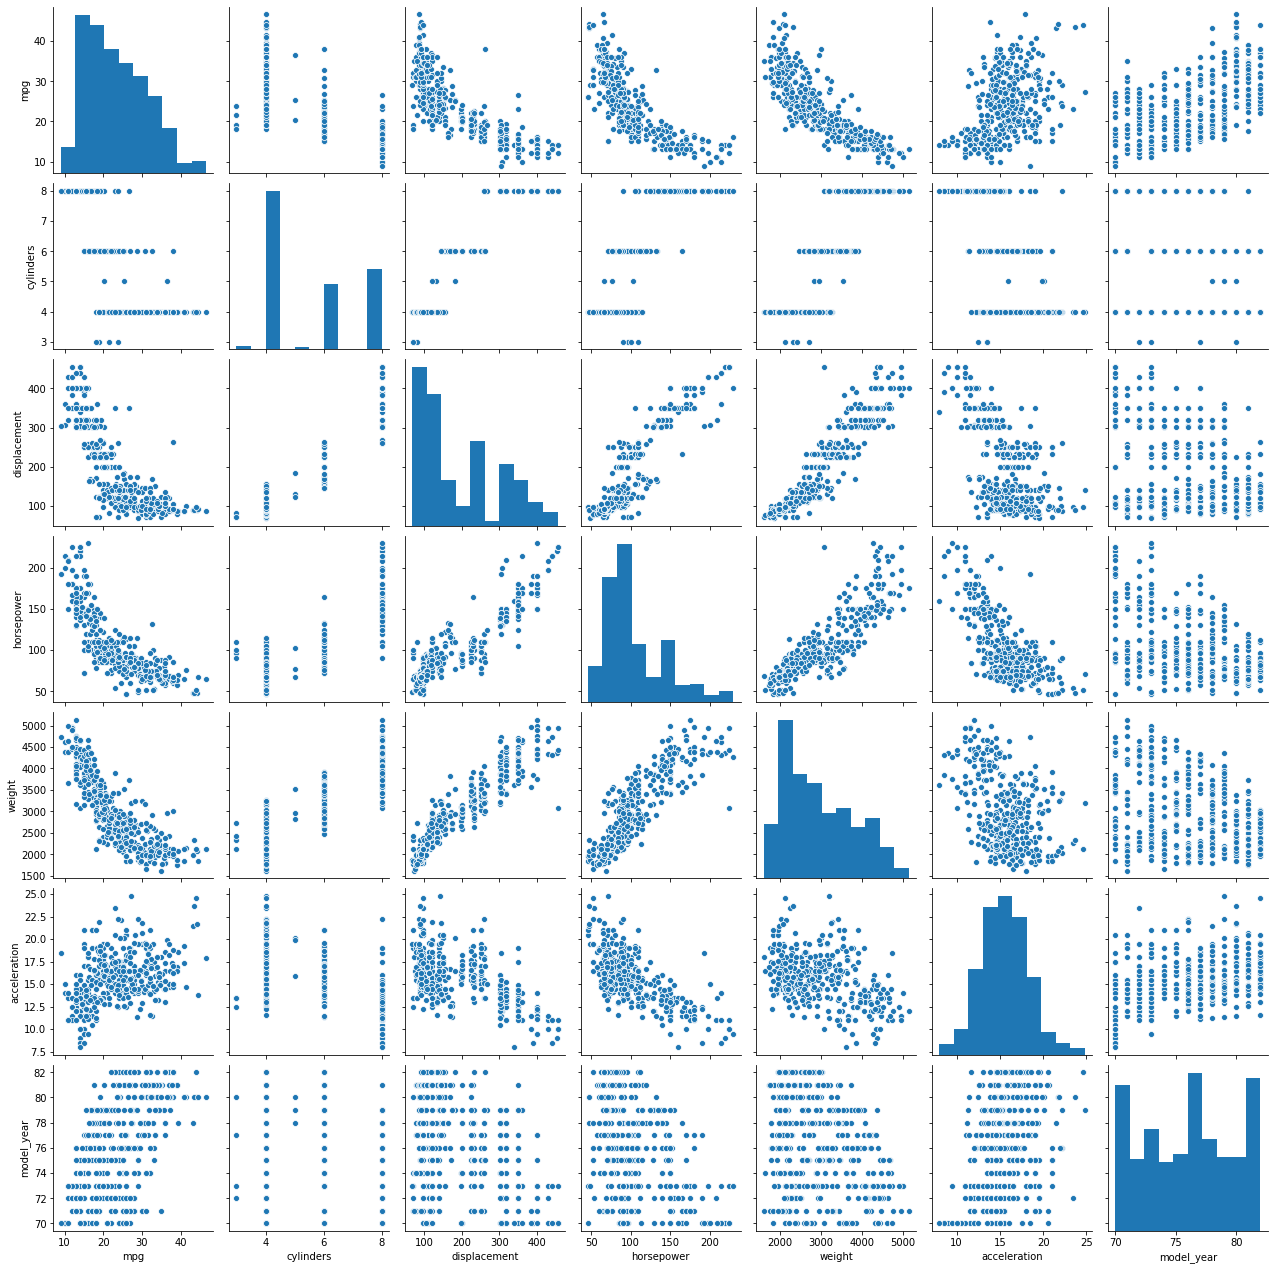

In [23]:
import numpy as np
import matplotlib.pylab as plt

fig = sns.pairplot(mpg_n)

In [0]:
mpg_nNan = mpg_n.dropna()

In [42]:
from sklearn.preprocessing import StandardScaler
mpg_nS = StandardScaler().fit_transform(mpg_nNan)
mpg_nS.shape

(392, 7)

In [0]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=7).fit(mpg_nS)

In [49]:
100*pca.explained_variance_ratio_.cumsum()

array([ 71.58051179,  83.94610315,  94.35172845,  96.97908694,
        98.72074871,  99.49585101, 100.        ])

In [45]:
mpgproj = pca.transform(mpg_nS)
mpgproj.shape

(392, 7)

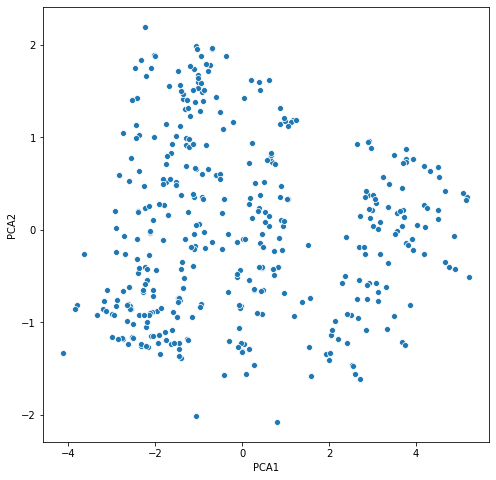

In [56]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

mpgpca = pd.DataFrame(mpgproj[:,0:2],columns=['PCA1', 'PCA2'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA1", y="PCA2",data=mpgpca)
plt.show()

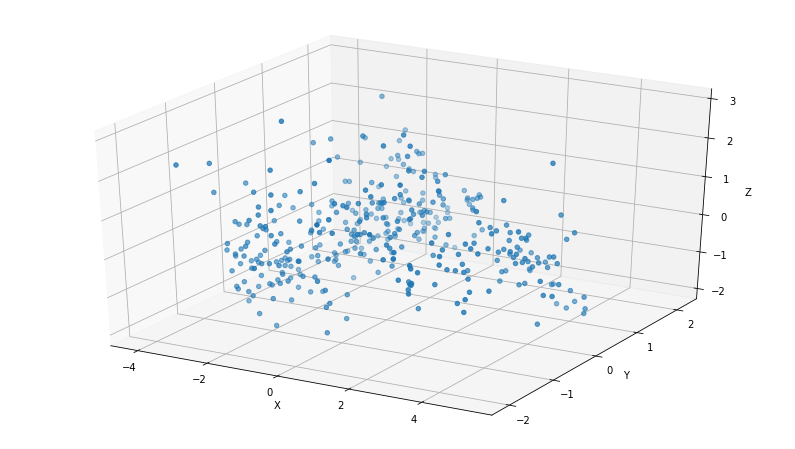

In [58]:
import matplotlib.pyplot as plot
# representación gráfica de los datos:
fig = plot.figure(1,figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mpgproj[:,0],mpgproj[:,1],mpgproj[:,2])
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plot.show()
